# Permutaciones
Las permutaciones se dan cuando existe una sospecha de si dos muestras son iguales o no. Esta tecnica se basa en generar una distribucion de las diferencias de las medias de la data original.

Como un ejemplo podemos imaginar que en las elecciones de estados unidos hay dos estados debatiendose por el partido democratico, de modo que tenemos a Pensilvania y a Ohio y queremos saber si en media estos dos estados poseen una diferente media de electores que quieren botar por el partido democratico o realmente en media son parecidos.

Todo esto suponiendo que hay una media de 2 miembros por familia en Pensilvania y 2 miembros por familia en Ohio que desean botar por el partido democratico.

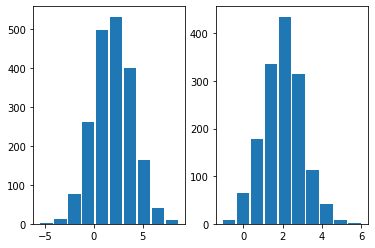

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Para evitar la aleatoriedad constante se agreda un seed.
np.random.seed(20)

pen_mean = 2
pen_sd = 2

oh_mean = 2
oh_sd = 1

pen = np.random.normal(pen_mean, pen_sd, size=2000)
oh = np.random.normal(oh_mean, oh_sd, size=1500)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(pen, rwidth=0.9)
ax2.hist(oh, rwidth=0.9)

plt.show()

## Pasos para una permutacion

- Elija una estadística de prueba que mida el efecto que estamos buscando entre los dos conjuntos de datos (este paso es común con las pruebas de arranque). Por lo general, esta es una diferencia entre una estadística "base"(la media por lo general pero tambien puede ser la desviacion standard, la mediana, etc.) para cada conjunto de datos.
- Construya la distribución de muestreo que tendría este estadístico de prueba si el efecto NO estuviera presente (este es el núcleo distintivo de las pruebas de permutación).
- Localice el valor estadístico de prueba observado (empírico) en esta distribución hipotética. Un valor en el cuerpo principal de la distribución podría ocurrir fácilmente por casualidad. Un valor en una cola rara vez ocurriría por casualidad, lo que sería la evidencia de que está operando algo diferente a la casualidad (esto es común con el arranque).

## Permutation Replicate

Aca es donde es posible mezclar ambas muestras y redistribuirlas de forma aleatoria parta construir muestras diferentes de modo que podemos saber si las muestras son diferentes o no, esto es a lo que se conoce como permutation replicate, no importa si el tamaño de las muestras es igual o no.

In [ ]:
import numpy as np

def permutation_replicate(sample1, sample2):

  total = []

  for s1 in sample1:

    total.append(s1)

  for s2 in sample2:

    total.append(s2)

  np.random.shuffle(total)

  s1 = total[:len(sample1)]
  s2 = total[len(sample1):]

  return s1, s2

sample1, sample2 = permutation_replicate(pen, oh)
len(sample1), len(sample2)

(2000, 1500)

## Permutation

Una vez se tienen los permutations replicates es posible generar una distribucion hecha a base de las diferencias de las medias de las muestras, esto es a lo que se conoce como permutacion. **Es importante saber que aca es donde se empieza con el primer paso escogiendo el estadistico, en este caso escogeremos la media, a su vez tambien tambien aca costruimos la distribucion de muestra**.

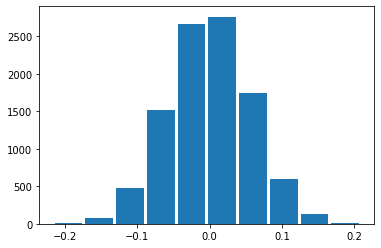

In [ ]:
Size = 10000 

def permutation(size, samp1, samp2):
  
  permutation = []

  for _ in range(size):

    sample1, sample2 = permutation_replicate(samp1, samp2)

    # Definiendo la media como estadistico.

    permutation.append(np.mean(sample1) - np.mean(sample2))

  return np.array(permutation)

plt.hist(permutation(Size, pen, oh), rwidth=0.9)
plt.show()

## Intervalos de confianza

Existen dos formas para poder hallar intervalos de confianza, uno es mediante la distribucion normal y la otra es mediante quantiles.

### Permutacion para localizar los intervalos de confianza
Para poder localizar los intervalos de confianza es necesario generar una distribucion permutada.

In [ ]:
permutation_dist = permutation(1000, pen, oh)

In [ ]:
#@title Intervalo de confianza 95% con quantiles(dos colas)

higher = np.quantile(permutation_dist, 0.975)
lower = np.quantile(permutation_dist, 0.025)
lower, higher

(-0.11286297748271604, 0.1144634974481301)

In [ ]:
#@title Intervalo de confianza 95% con scipy intervals

import scipy.stats as st

m = np.mean(permutation_dist)
sd = np.std(permutation_dist)

normal = st.norm(m, sd)
normal.interval(0.95)

(-0.11252182789640747, 0.11048954941870576)

## Pruebas de hipotesis
Las pruebas de hipotesis en este caso solamente se dan de una forma y es para dos muestras y empleando dos colas. De modo que las hipotesis se plantean de la siguiente manera:

|Hipotesis nula($H_0$)|Hipotesis alterna($H_a$)|
|---|---|
|$H_0: p \ne 0$|$H_a: p = 0$|

Es de esta forma ya que lo que se quiere probar es la diferencia.

### Diferencia Empirica(Empirical difference)
La diferencia empirica es la diferencia real de las muestras. Algo importante es que aca ya hicimos el primer paso ya que definimos la media tanot en la distribucion permutada como en la diferencia empirica.

In [ ]:
empirical_diff = np.mean(pen) - np.mean(oh)

### Construyendo distribucion

In [ ]:
permutation_dist = permutation(1000, pen, oh)

### Valor p

Ahora podemos obtener el valor p para poder hacer pruebas de hipotesis, **este es el ultimo paso donde localizamos un estadistico muy poco comun en la distribucion, en este caso escogeremos el 95%**.

In [ ]:
p = np.sum(permutation_dist >= abs(empirical_diff)) / len(permutation_dist)

print('p:', p)

p: 0.295


Aca obtuvimos un valor p de 29.5% de modo que si emplearamos un intervalo de confianza de 95% fallamos en rechazar la hipotesis nula.

### Forma grafica


En este caso es posible observar que la proporcion de la distribucion real en contraste con la nueva distribucion es de 29.5%

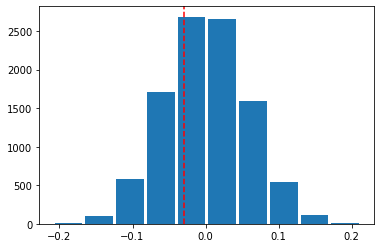

In [ ]:
plt.hist(permutation(Size, pen, oh), rwidth=0.9)
plt.axvline(empirical_diff, color='r', ls='--')
plt.show()

# Bootstrapping

Bootstrapping es el uso una tecnica llamada **resampling**, la cual implica sacar muestras de una muestra existente de forma a leatoria pero con reemplazo, esto para obtener una inferencia estadistica creando una porblacion teorica para poder realizar esta, bootstrapping funciona de forma similar a la del **teorema del limite central** y del **muestreo simple** pero con una diferencia:

|Muestreo|Bootstrapping|
|---|---|
|Va de una poblacion a una muestra pequeña|Construye una poblacion teorica de una muestra|

Ademas, hay algunos pasos a seguir para realizar bootstrapping:

*   Haga una muestra con reemplazo del mismo tamaño que la muestra original (lo más importante aquí es el muestreo con reemplazo que hace que cada muestra sea diferente para construir el modelo con bootstrapping).
*   Calcule la estadística de interés para realizar el bootstrapping (la media es la más común, pero podemos usar la mediana, la desviación estándar u otras estadísticas en su lugar)
*   Repita los pasos uno y dos muchas veces para obtener la distribución.

Es posible emplear el bootstrapping para convertir una muestra con una distribucion **x** o cualquiera en una distribucion normal, de este modo tambien existen otros modos de generar muestras aleatorias, asi como las permutaciones.

## Creando una distribucion uniforme para poder relizar el bootstrapping

Algo importante tanto sobre el bootstrapping como sobre las permutaciones es que ambos no poseen ninguna condicion asi como la normalidad de la data de modo que podemos partir de una distribucion uniforme.

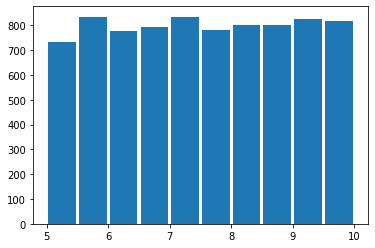

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 8000

uniformD = np.random.uniform(low= 5, high= 10, size= sample_size)

plt.hist(uniformD, rwidth= 0.9)
plt.show()

## Creando una distribucion con bootstrapping

En este caso vamos a generar una distribucion con bootstrapping empleando la media como estadistico de interes.

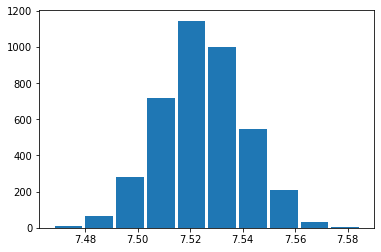

In [ ]:

bootstrap_dist = []

for i in range(4000):

  bootstrap_dist.append(np.mean(np.random.choice(uniformD, size= sample_size, replace=True)))

plt.hist(bootstrap_dist, rwidth=0.9)
plt.show()

## Test de normalidad
Podemos emplear un test de normalidad para poder determinar si es que la nueva distribucion es normal o no, en este caso el test de Shaphiro Wilks en el cual se tiene un valor p de 56.2% lo cual indica que bajo un nivel de confianza del 95% la distribucion es normal ya que es posible fallar en rechazar la hipotesis nula.

In [ ]:
st.shapiro(bootstrap_dist)

ShapiroResult(statistic=0.9994852542877197, pvalue=0.3642295002937317)

## Intervalos de confianza
Al emplear bootstrapping los intervalos de confianza nos aseguran una probabilidad de hallar el valor mas comun en nuestra muestra inicial o dicho de otra forma la media(en caso de emplearse la media) de la muestra que se empleo para este proceso.

Hay dos formas de definir los intervalos de confianza, una es usando quantiles y la otra es con intervalos de scipy.

### Por que bootstrapping para intervalos de confianza

- Bootstrapping es, en primer lugar, una forma práctica de encontrar la distribución de muestreo, al menos aproximadamente, a partir de una sola muestra, en lugar de extraer múltiples muestras aleatorias de una población.

- Simula la extracción de múltiples muestras aleatorias utilizando solo una muestra de una población, por lo que depende en gran medida de que esta única muestra sea lo más aleatoria posible.

- La prueba Bootstrap no impone la restricción de normalidad en la distribución de la(s) población(es) de la(s) que se extrae(n) la(s) muestra(s) real(es), a diferencia de la prueba t tradicional.

### Intervalo de confianza 95% con quantiles(dos colas)

In [ ]:
lower= np.quantile(bootstrap_dist, 0.025)
higher= np.quantile(bootstrap_dist, 0.975)

lower, higher

(7.492769273036164, 7.5561061626583115)

### Intervalo de confianza 95% con scipy intervals

In [ ]:
mean = np.mean(bootstrap_dist)
stdev = np.std(bootstrap_dist)

normal = st.norm(mean, stdev)

# La media de la muestra se encuentra dentro de este intervalo.
normal.interval(0.95)

(7.493102665512756, 7.55582749521086)

## Pruebas de hipotesis
Bootstrapping posee algunas variaciones para pruebas de hipotesis pero la logica detras es la de crear una distribucion hipotetica que  cumple perfectamente con la hipotesis nula($H_0$).

### Pruebas de hipotesis con una muestra

Podemos realizar pruebas de hipotesis con una sola muestra, para esto se unifica el metodo tradicional(normal o t-student) con el metodo del bootstrapping(la generacion de una distribucion hipotetica teniendo simulando la hipotesis nula($H_0$)).

Para esto es necesario recordar como se realizan las pruebas de hipotesis de forma convencional. **Es importante mencionar que para esto vamos a emplear la media como estadistico**

#### Pasos

1. Establecer la hipotesis nula y la alterna, para esto podemos seguir el siguiente criterio:

|Hipotesis|Dos colas(diferente)|Una cola positiva(mayor)|Una cola negativa(menor)|
|---|---|---|--|
|$H_0$|$H_0: \mu= \mu_0$|$H_0: \mu= \mu_0$|$H_0: \mu= \mu_0$|
|$H_a$|$H_a: \mu \ne \mu_0$|$H_a: \mu > \mu_0$|$H_a: \mu < \mu_0$|

Donde:

- $H_0$, es la hipotesis nula.
- $H_a$, es la hipotesis alterna.
- $\mu$, es la media muestral.
- $\mu_0$, es la media poblacional.

2. Crear la distribucion con bootstrapping.
3. Moldear la nueva distribucion a la hipotesis nula.
4. Comparar distribuciones.
5. Tomar una decision.

#### Data
Aqui escogeremos la data para poder realizar las pruebas, esta data es de las elecciones en estados unidos, vamos a suponer que en el año 2010 la media de de electores en el estado de Pensilvania que votaron por el partido democratico fue de 70%, años despues en las proximas elecciones se obtuvo la siguiente data:

```
PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 
                44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 
                43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 
                49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 
                43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 
                37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 
                46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 
                37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 
                43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 
                43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 
                49.81]
```

De modo que se quiere saber si es que esta muestra es diferente a la poblacion de la eleccion pasada.


In [ ]:
pa = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 
                44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 
                43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 
                49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 
                43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 
                37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 
                46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 
                37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 
                43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 
                43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 
                49.81]

#### Estableciendo hipotesis

Las hipotesis seran las siguientes:

|Hipotesis alterna($H_a$)|Hipotesis nula($H_0$)|
|---|---|
|$H_0: \mu= \mu_0$|$H_0: \mu \ne \mu_0$|

#### Generando distribucion con bootstrapping

Mean: 45.47960705970149
Standard deviation: 1.1827478447549415
Median: 45.474701492537314
Size: 10000


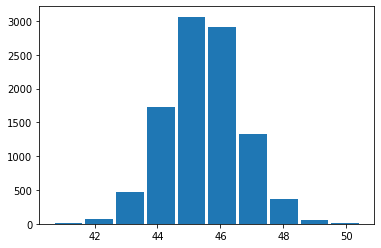

In [ ]:
def one_boots(data, iterations, stat):

  dist = []

  np.random.seed(45)

  for _ in range(iterations):

    dist.append(stat(np.random.choice(data, len(data), replace=True)))

  return np.array(dist)

def m_stats(data):

  print('Mean:', np.mean(data))
  print('Standard deviation:', np.std(data))
  print('Median:', np.median(data))
  print('Size:',len(data))

  return np.mean(data), np.std(data), np.median(data), len(data)

o_boots = one_boots(pa, 10000, np.mean)
m_stats(o_boots)
plt.hist(o_boots, rwidth=0.9)
plt.show()

#### Moldeando la distribucion
Ahora vamos a moldear la nueva distribucion a la de la poblacion anterior la cual poseia una media de 70, de este modo primero vamos a retirar la media ya existente:

$$\text{new boots} = boots - mean(boots)$$

Donde:

- boots, es la nueva distribucion creada mediante bootstrapping.
- new boots, es la nueva distribucion sin media.

Posteriormente vamos a amoldar la nueva distribucion con la media de 70:

$$\text{new boots} + 70$$

Donde:

- new boots, es la nueva distribucion sin media.

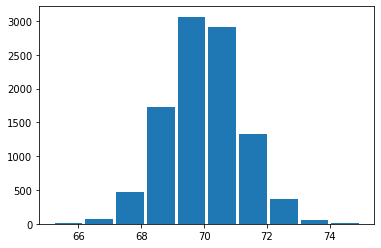

In [ ]:
new_boots = (o_boots - np.mean(o_boots)) + 70
plt.hist(new_boots, rwidth=0.9)
plt.show()

#### Comparando distribuciones.

Algo importante para hacer esta parte es recordar que tipo de prueba queremos realizar, de modo que:

- Si estamos realizando una prueba de cola izquierda, necesitamos tomar los valores de la izquierda.
- Si estamos realizando una prueba de cola derecha, debemos tomar los valores de la derecha.
- Si estamos realizando una prueba de dos colas, debemos tomar los valores más pequeños (porque siempre representa una región de cola) y multiplicarlo por 2 ya que es un analisis de dos colas.

Los Comandos a emplear para realizar estas pruebas de hipotesis son los siguientes:

|Cola izquierda|Cola derecha|Dos colas|
|---|---|---|
|<=|>=|<=|

In [ ]:
p = np.sum(new_boots <= np.mean(o_boots)) / len(o_boots)
p * 2

0.0

#### Tomando una decision

El valor p obtenido es de 0 lo cual en caso de emplear un nivel de confianza de 95% nos dice que ambas muestras son diferentes de modo que se rechaza la hipotesis nula y podemos afirmar que nuestra nueva muestra es diferente a la de la poblacion del año 2010.

Como conclusion podemos afirmar que ambas las preferencias de la gente dentro del estado de Pensilvania fue diferente para las siguientes elecciones.

#### Comparacion grafica de las muestras
Si vemos las muestras de forma grafica en este caso es muy evidente la diferencia.

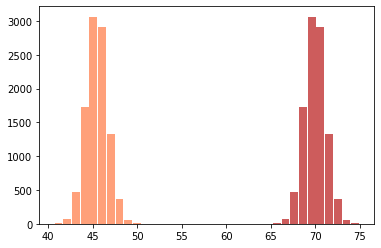

In [ ]:
plt.hist(o_boots, rwidth=0.9, color='LightSalmon')
plt.hist(new_boots, rwidth=0.9, color='IndianRed')
plt.show()

### Pruebas de hipotesis con dos muestras



#### Pasos

1. Establecer la hipotesis nula y la alterna, para esto podemos seguir el siguiente criterio:

|Hipotesis|Dos colas(muestras diferentes)|Una cola positiva(mayor)|Una cola negativa(menor)|
|---|---|---|--|
|$H_0$|$H_0: \mu_1 - \mu_2 = 0$|$H_0: \mu_1 - \mu_2= 0$|$H_0: \mu_1 - \mu_2 = 0$|
|$H_a$|$H_a: \mu_1 - \mu_2 \ne 0$|$H_a: \mu_1 - \mu_2 > 0$|$H_a: \mu_1 - \mu_2 < 0$|

Donde:

- $H_0$, es la hipotesis nula.
- $H_a$, es la hipotesis alterna.
- $\mu_1$, es la media muestral.
- $\mu_2$, es la media poblacional.

2. Crear la distribucion con bootstrapping.
3. Moldear la nueva distribucion a la hipotesis nula.
4. Comparar distribuciones.
5. Tomar una decision.

#### Data

Para el analisis de dos muestras emplearemos data igual de Pensilvania pero aumentaremos data de Ohio. De modo que queremos probar con un nivel de confianza de 95% si es que las perosnas en estos dos estados tienen preferencias electorales diferentes dos estados son diferentes:

```
PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 
                44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 
                43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 
                49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 
                43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 
                37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 
                46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 
                37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 
                43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 
                43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 
                49.81, 34.84, 47.75, 43.82, 55.97, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 63.10, 
                52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 
                40.11, 49.85, 48.61, 36.2]

OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 
                57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 
                54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 
                28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 
                42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 
                47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 
                51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 
                47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 
                35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 
                48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 
                46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 
                33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 
                36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 
                68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 
                36.54, 49.58, 41.97, 38.11]
```



In [ ]:
PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 
                44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 
                43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 
                49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 
                43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 
                37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 
                46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 
                37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 
                43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 
                43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 
                49.81, 34.84, 47.75, 43.82, 55.97, 57.81, 
                54.58, 32.88, 54.37, 40.45, 47.61, 63.10, 
                52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 
                40.11, 49.85, 48.61, 36.2]

OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 
                57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 
                54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 
                28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 
                42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 
                47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 
                51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 
                47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 
                35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 
                48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 
                46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 
                33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 
                36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 
                68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 
                36.54, 49.58, 41.97, 38.11]

In [ ]:
# Notese que en este caso ambas muestras tienen tamaños iguales.

len(OH), len(PA)

(88, 88)

#### Estableciendo hipotesis

Las hipotesis seran las siguientes:

|Hipotesis nula para dos muestras($H_0$)|Hipotesis alterna para dos muestras($H_a$)|
|---|---|
|$H_0: \mu_1 - \mu_2 = 0$|$H_0: \mu_1 -\mu_2 \ne 0$|

#### Generando distribuciones con bootstrapping

##### PA

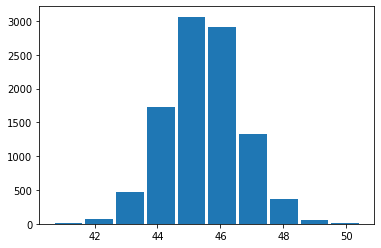

In [ ]:
pa_boots = one_boots(PA, 10000, np.mean)

plt.hist(pa_boots, rwidth=0.9)
plt.show()

##### OH

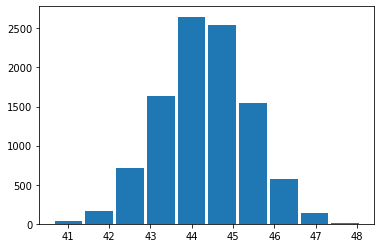

In [ ]:
oh_boots = one_boots(OH, 10000, np.mean)

plt.hist(oh_boots, rwidth=0.9)
plt.show()

#### Moldeando la distribucion
Ahora vamos a moldear la nueva distribucion empleando ambas distribuciones, hay que recordar que esta es una prueba de dos muestras, eso significa que en este caso emplearemos la media de ambas muestras para maldear la nueva muestra hipotetica, esto de la siguiente forma:

$$\text{new boots(A)} = boots(A) - mean(Sample(A))$$
$$\text{new boots(B)} = boots(B) - mean(Sample(B))$$

Donde:

- $\text{new boots(A)}$, es la nueva distribucion de la muestra A llevada a media 0.

- $\text{boots(A)}$, es la nueva distribucion generada empleando bootstrapping.

- $\text{mean(Sample(A))}$, es la media de la muestra A la cual se emplea para llevar la nueva distribucion a media de 0.

- $\text{new boots(B)}$, es la nueva distribucion de la muestra B llevada a media 0.

- $\text{boots(B)}$, es la nueva distribucion generada empleando bootstrapping.

- $\text{mean(Sample(B))}$, es la media de la muestra B la cual se emplea para llevar la nueva distribucion a media de 0.

Posteriormente es neceario generar una media de ambas muestras concatenadas para poder sumar esta media al resultado anterior, de este modo generando una poblacion hipotetica simulando la hipotesis nula:

$$\text{mean(Sample(A) Concat Sample(B))}$$

Donde:

- $Sample(A)$, es la muestra A.

- $Sample(B)$, es la muestra B.

- $mean$, es la media.

Para concluir es necesario sumar ambos resultados generando la ya mencionada poblacion hipotetica simulando la hipotesis nula:

$$\text{new boots(A)} = boots(A) - mean(Sample(A)) + mean(Sample(A) Concat Sample(B))$$

$$\text{new boots(B)} = boots(B) - mean(Sample(B)) + mean(Sample(A) Concat Sample(B))$$

#### Comparando distribuciones.

Algo importante para hacer esta parte es recordar que tipo de prueba queremos realizar, de modo que:

- Si estamos realizando una prueba de cola izquierda, necesitamos tomar los valores de la izquierda.
- Si estamos realizando una prueba de cola derecha, debemos tomar los valores de la derecha.
- Si estamos realizando una prueba de dos colas, debemos tomar los valores más pequeños (porque siempre representa una región de cola) y multiplicarlo por 2 ya que es un analisis de dos colas.

Los Comandos a emplear para realizar estas pruebas de hipotesis son los siguientes:

|Cola izquierda|Cola derecha|Dos colas|
|---|---|---|
|<=|>=|<=|

Por ultimo al realizar una prueba de dos muestras es necesario restar ambas muestras modificadas para compararlas con la resta de las medias de las muestras.

In [ ]:
two_boots = pa_boots - oh_boots
two_boots

array([-2.51807666, -2.25206581,  2.06685041, ...,  0.99746099,
       -0.3437924 ,  1.48971336])

In [ ]:
empirical_diff_means = np.mean(PA) - np.mean(OH)
empirical_diff_means

1.3187500000000014

In [ ]:
p_two = np.sum(two_boots <= empirical_diff_means) / len(two_boots)
print('p-value =', p_two*2)

p-value = 1.0864


#### Tomando una decision

El valor p obtenido es de 1.0864 una vez multiplicado por 2 debido a que es una prueba de dos colas lo cual implica que empleando un nivel de confianza de 95% es posible fallar en rechazar la hipotesis nula y afirmar que ambas distribuciones se parecen a la poblacion hipotetica que simula la hipotesis nula.

# Diferencia entre Permutaciones y Bootstrapping
Ambas tecnicas son tecnicas para poder realizar pruebas de hipotesis sin tener en cuanta la asuncion de normalidad, de modo que encajan a cualquier distribucion.

## Diferencias entre ambos metodos 

Bootstrapping es un método más general que no se limita a los escenarios con dos conjuntos de datos, no se limita a la prueba de hipótesis, y menos restringido en términos de hipótesis nula y alternativa. Debe usarse para estimar los intervalos de confianza y para la prueba de hipótesis cuantitativa de efectos conocidos.
La prueba de permutación se puede usar en entornos con dos conjuntos de datos (dos muestras, pares emparejados o dos variables en una muestra), y se debe usar cuando estamos interesados ​​en confirmar la presencia (o la ausencia) de un cierto efecto que es observable entre los dos conjuntos de datos.

El método de permutación agrega más aleatoriedad al proceso de prueba que el arranque (esta diferencia es más obvia cuando las muestras son más pequeñas), por lo que obtenemos una respuesta más conservadora. Esta es la razón por la que las pruebas de permutación son una mejor opción para las pruebas de hipótesis categóricas.
En este ejemplo específico, si nuestro nivel de significación se estableciera en 10%, la elección del método marcaría la diferencia crítica, ya que los valores p caen en lados diferentes (y esta es también la razón por la que siempre debemos determinar una significancia). nivel antes de implementar una prueba, por lo que no estamos tentados a volver a resolver).

En resumen, las pruebas de permutación deben usarse para:

- Prueba de hipótesis para la presencia (o ausencia) de efectos (por ejemplo, si está presente algún efecto de cierto tipo, o si está presente algún efecto positivo, o si está presente algún efecto negativo).

Bootstrapping se debe utilizar para:

- Pruebas de hipótesis cuantitativas para efectos específicos conocidos/esperados (p. ej., ¿mejoró realmente la vida útil promedio de las baterías de los automóviles en un año o más?).
- Determinación de intervalos de confianza de forma no paramétrica.

## Diferencia de hipotesis

Bootstrapping
- Ho: media (puntuación del grupo de tratamiento) — media (puntuación del grupo de control) = 0
- Ha: media (puntuación del grupo de tratamiento) — media (puntuación del grupo de control) >= 0
- Dirección: cola derecha

---

- Ho : media (la cuarta parte más baja de las puntuaciones del grupo de tratamiento) — media (la cuarta parte más baja de las puntuaciones del grupo de control) = 0
- Ha: media (cuarto más bajo de las puntuaciones del grupo de tratamiento) — media (cuarto más bajo de las puntuaciones del grupo de control) <= 0
- Dirección: cola izquierda

Permutacion
- Ho : las distribuciones de las puntuaciones de los estudiantes son las mismas (incluidas las medias) = 0
- Ha: media (puntuación del grupo de tratamiento) — media (puntuación del grupo de control) > 0
- Dirección: cola derecha

---

- Ho : las distribuciones de puntajes de los estudiantes son las mismas (incluidas las medias de los cuartos más bajos de puntajes)
- Ha: media (cuarto más bajo de las puntuaciones del grupo de tratamiento) — media (cuarto más bajo de las puntuaciones del grupo de control) < 0
- Dirección: cola izquierda